<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Prediction and Classification with Python</font></h1>


# Instructions


In this notebook, you will practice prediction with Linear Regression and classification with all the algorithms that we learned in this course.
We will use some of the algorithms taught in the course, specifically:

1.  Linear Regression (For Prediction)
2.  KNN
3.  Decision Trees
4.  Logistic Regression
5.  SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report displaying the accuracy scores.


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [1]:
!pip install pandas==1.3.4

In [2]:
!pip install numpy==1.21.4

In [3]:
!pip install seaborn==0.9.0

In [4]:
!pip install matplotlib==3.5.0

In [5]:
!pip install scikit-learn==1.2.1

In [6]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [8]:
df = pd.read_csv(r'C:\Users\ASUS\OneDrive\Documents\Data Analyst Course\Portofolio\Weather_Data.csv')
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### Transforming Categorical Variables


First, we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [9]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_sydney_processed.head(5)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,0,0,0,0,0,1,0,0,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,0,0,0,0,0,0,0,0,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,0,0,0,0,0,0,0,0,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,0,0,0,0,0,0,0,0,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,0,0,0,0,0,0,0,1,0,0


Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [10]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)
df_sydney_processed.head(5)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,0,0,0,0,0,1,0,0,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,0,0,0,0,0,0,0,0,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,0,0,0,0,0,0,0,0,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,0,0,0,0,0,0,0,0,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,0,0,0,0,0,0,0,1,0,0


### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [11]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [12]:
df_sydney_processed = df_sydney_processed.astype(float)

In [13]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

## 1. Linear Regression


In [14]:
# splitting the data with test_size of 20% and random_state of 42
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state = 42)
x_train.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
790,16.4,25.0,4.4,5.0,9.9,41.0,15.0,20.0,68.0,55.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2962,11.2,24.3,0.0,4.8,10.0,48.0,11.0,24.0,66.0,37.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,15.4,21.2,1.8,5.4,2.5,39.0,11.0,19.0,59.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1025,21.4,27.2,0.0,8.8,11.7,46.0,7.0,28.0,78.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2991,10.7,22.4,0.0,5.4,8.8,37.0,6.0,19.0,52.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Creating and training a linear regression model
from sklearn import linear_model
LinearReg = linear_model.LinearRegression()
LinearReg.fit(x_train, y_train)
print ('Coefficients: ', LinearReg.coef_)

Coefficients:  [-2.66502115e-02  7.28522043e-03  7.96053837e-04  7.82215525e-03
 -3.64093622e-02  3.66147899e-03  9.52971429e-04  4.89953678e-04
  7.26789029e-04  9.51795496e-03 -1.11889805e-04 -3.16301673e-03
 -1.04948435e-02  1.15329706e-02  1.18078611e-02  5.74441764e-03
  7.69273053e+10  7.69273053e+10  8.30031766e+09  8.30031766e+09
  8.30031766e+09  8.30031766e+09  8.30031766e+09  8.30031766e+09
  8.30031766e+09  8.30031766e+09  8.30031766e+09  8.30031766e+09
  8.30031766e+09  8.30031766e+09  8.30031766e+09  8.30031766e+09
  8.30031766e+09  8.30031766e+09 -1.07810268e+10 -1.07810268e+10
 -1.07810268e+10 -1.07810268e+10 -1.07810268e+10 -1.07810268e+10
 -1.07810268e+10 -1.07810268e+10 -1.07810268e+10 -1.07810268e+10
 -1.07810268e+10 -1.07810268e+10 -1.07810268e+10 -1.07810268e+10
 -1.07810268e+10 -1.07810268e+10  9.55448633e+09  9.55448633e+09
  9.55448633e+09  9.55448633e+09  9.55448633e+09  9.55448633e+09
  9.55448633e+09  9.55448633e+09  9.55448633e+09  9.55448633e+09
  9.554486

In [16]:
# Using predict method on the testing data
predictionsLR = LinearReg.predict(x_test)
predictionsLR[0:5]

array([-0.05117798,  0.82241821,  0.18125916,  0.43487549,  0.66784668])

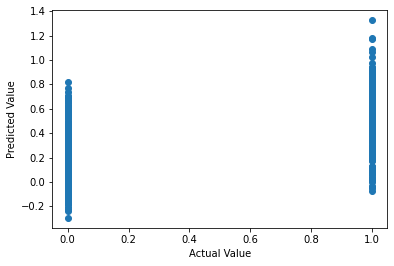

In [17]:
# Plotting the actual vs predicted value
import matplotlib.pyplot as plt
plt.scatter(y_test, predictionsLR)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [18]:
# Calculate the metric with predictionsLR and y_test
from sklearn.metrics import r2_score
LinearRegression_MAE = np.mean(np.absolute(predictionsLR - y_test))
LinearRegression_MSE = np.mean((predictionsLR -y_test)**2)
LinearRegression_R2 = r2_score(y_test, predictionsLR)
print("Mean absolute error: %.2f" % LinearRegression_MAE)
print("Residual sum of squares (MSE): %.2f" % LinearRegression_MSE)
print("R2-score: %.2f" % LinearRegression_R2 )

Mean absolute error: 0.27
Residual sum of squares (MSE): 0.13
R2-score: 0.34


In [19]:
# Showing the calculated metric into a tabular format
from tabulate import tabulate
Report = pd.DataFrame({'error type':['MAE','MSE','R2'],'value':[LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2]})
print(tabulate(Report, headers = 'keys', tablefmt = 'psql'))

+----+--------------+----------+
|    | error type   |    value |
|----+--------------+----------|
|  0 | MAE          | 0.270495 |
|  1 | MSE          | 0.131713 |
|  2 | R2           | 0.336789 |
+----+--------------+----------+


#### with linear regression, the prediction model of Australian weather data can be formed with the value 0.27 of MAE, 0.13 of MSE, and 33% of R^2.

## 2. KNN


In [20]:
# Creating and training a KNN Model using n_neighbors = 4
KNN = KNeighborsClassifier(n_neighbors = 4).fit(x_train,y_train)
KNN

KNeighborsClassifier(n_neighbors=4)

In [21]:
# Using predict method on the testing data
predictionsKNN = KNN.predict(x_test)
predictionsKNN[0:5]

array([0., 1., 0., 0., 1.])

In [22]:
# Comparing predicted and actual values
CompareKNN = pd.DataFrame({'Actual': y_test, 
                   'Predicted': predictionsKNN,
                  'Abs. Error': abs(predictionsKNN-y_test)})
CompareKNN.head(10)

,Actual,Predicted,Abs. Error
1644,0.0,0.0,0.0
134,1.0,1.0,0.0
411,0.0,0.0,0.0
203,0.0,0.0,0.0
1159,1.0,1.0,0.0
1378,1.0,1.0,0.0
1356,0.0,0.0,0.0
2964,0.0,0.0,0.0
463,0.0,0.0,0.0
291,0.0,0.0,0.0


#### with KNN on top 10 actual vs predicted, 7 out of 10 were correctly classified

In [24]:
import seaborn as sns

Text(42.0, 0.5, 'Truth')

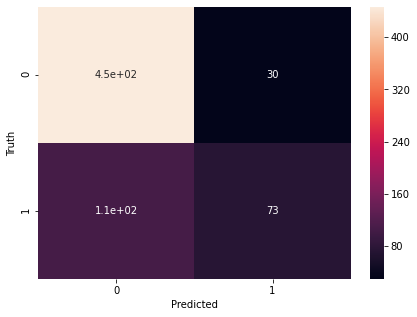

In [25]:
# Confusion matrix for KNN
cm_KNN = confusion_matrix(y_test, predictionsKNN)
plt.figure (figsize=(7,5))
sns.heatmap(cm_KNN, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
# Calculating each metrics using predictionsKNN and y_test
from sklearn.metrics import accuracy_score
KNN_Accuracy_Score = metrics.accuracy_score(y_test,predictionsKNN)
KNN_JaccardIndex = metrics.jaccard_score(y_test,predictionsKNN)
KNN_F1_Score = metrics.f1_score(y_test,predictionsKNN)
KNN_Log_Loss = 'NA'
print("KNN Accuracy Score: ",KNN_Accuracy_Score)
print("KNN_JaccardIndex: ",KNN_JaccardIndex)
print("KNN F1 score : ", KNN_F1_Score)

KNN Accuracy Score:  0.7923664122137405
KNN_JaccardIndex:  0.3492822966507177
KNN F1 score :  0.5177304964539008


## 3. Decision Tree


In [27]:
# Creating and training a decision tree model using the training data
Tree = DecisionTreeClassifier()
Tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
# Using predict method on the testing data
predictionsDT = Tree.predict(x_test)
predictionsDT[0:5]

array([0., 1., 0., 1., 1.])

In [29]:
# Comparing predicted and actual values
CompareDT = pd.DataFrame({'Actual': y_test, 
                   'Predicted': predictionsDT,
                  'Abs. Error': abs(predictionsDT-y_test)})
CompareDT.head(10)

,Actual,Predicted,Abs. Error
1644,0.0,0.0,0.0
134,1.0,1.0,0.0
411,0.0,0.0,0.0
203,0.0,1.0,1.0
1159,1.0,1.0,0.0
1378,1.0,1.0,0.0
1356,0.0,1.0,1.0
2964,0.0,0.0,0.0
463,0.0,0.0,0.0
291,0.0,0.0,0.0


#### with Decision tree on top 10 actual vs predicted, 7 out of 10 were correctly classified

Text(42.0, 0.5, 'Truth')

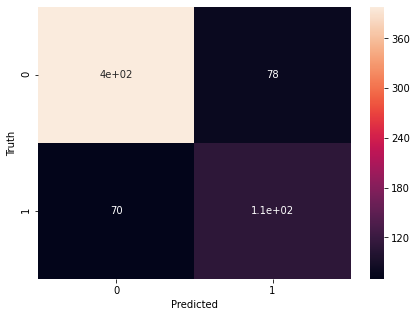

In [30]:
# Confusion matrix for Decision Tree
cm_DT = confusion_matrix(y_test, predictionsDT)
plt.figure (figsize=(7,5))
sns.heatmap(cm_DT, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
#Calculating each metrics using the predictionsDT and y_test
Tree_Accuracy_Score = metrics.accuracy_score(y_test, predictionsDT)
Tree_JaccardIndex = metrics.jaccard_score(y_test, predictionsDT)
Tree_F1_Score = metrics.f1_score(y_test, predictionsDT)
Tree_Log_Loss = 'NA'
print("Tree_accuracy_score: ", Tree_Accuracy_Score)
print("Tree_JaccardIndex : ", Tree_JaccardIndex)
print("Tree_F1_Score : ", Tree_F1_Score)

Tree_accuracy_score:  0.7740458015267175
Tree_JaccardIndex :  0.42412451361867703
Tree_F1_Score :  0.5956284153005464


## 4. Logistic Regression


In [32]:
# Creating and training a Logistic Regression model using C=0.01 and solver parameter set to liblinear
LogR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LogR

LogisticRegression(C=0.01, solver='liblinear')

In [33]:
# Using predict method on the testing data
predictionsLogR = LogR.predict(x_test)
predictionsLogR[:5]

array([0., 1., 0., 0., 1.])

In [34]:
# Comparing predicted and actual values
CompareLogR = pd.DataFrame({'Actual': y_test, 
                   'Predicted': predictionsLogR,
                  'Abs. Error': abs(predictionsLogR-y_test)})
CompareLogR.head(10)

,Actual,Predicted,Abs. Error
1644,0.0,0.0,0.0
134,1.0,1.0,0.0
411,0.0,0.0,0.0
203,0.0,0.0,0.0
1159,1.0,1.0,0.0
1378,1.0,0.0,1.0
1356,0.0,0.0,0.0
2964,0.0,0.0,0.0
463,0.0,0.0,0.0
291,0.0,0.0,0.0


#### with Logistic Regression on top 10 actual vs predicted, 7 out of 10 were correctly classified

Text(42.0, 0.5, 'Truth')

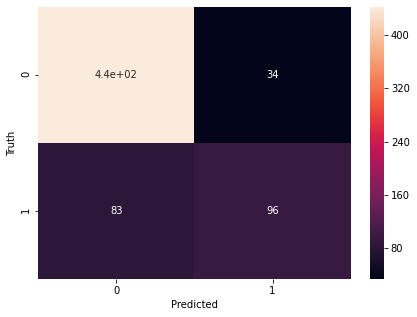

In [35]:
# Confusion matrix for Log Regression
cm_LogR = confusion_matrix(y_test, predictionsLogR)
plt.figure (figsize=(7,5))
sns.heatmap(cm_LogR, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
# Calculating each metrics with the predicitons and y_test
LR_Accuracy_Score = metrics.accuracy_score(y_test, predictionsLogR)
LR_JaccardIndex = metrics.jaccard_score(y_test, predictionsLogR)
LR_F1_Score = metrics.f1_score(y_test, predictionsLogR)
LR_Log_Loss = metrics.log_loss(y_test, predictionsLogR)
print("LR accuracy score: ", LR_Accuracy_Score)
print("LR JaccardIndex : ", LR_JaccardIndex)
print("LR F1 Score : ", LR_F1_Score)
print("LR Log Loss : ", LR_Log_Loss)

LR accuracy score:  0.8213740458015267
LR JaccardIndex :  0.4507042253521127
LR F1 Score :  0.6213592233009709
LR Log Loss :  6.438331979430086


## 5. SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [37]:
# Creating and training an SVM model with kernel set to linear
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [38]:
# Using predict method on the testing data
predictionsSVM = SVM.predict(x_test)
predictionsSVM[:5]

array([0., 1., 0., 0., 1.])

In [39]:
# Comparing predicted and actual values
CompareSVM = pd.DataFrame({'Actual': y_test, 
                   'Predicted': predictionsSVM,
                  'Abs. Error': abs(predictionsSVM-y_test)})
CompareSVM.head(10)

,Actual,Predicted,Abs. Error
1644,0.0,0.0,0.0
134,1.0,1.0,0.0
411,0.0,0.0,0.0
203,0.0,0.0,0.0
1159,1.0,1.0,0.0
1378,1.0,1.0,0.0
1356,0.0,0.0,0.0
2964,0.0,0.0,0.0
463,0.0,0.0,0.0
291,0.0,0.0,0.0


#### with SVM on top 10 actual vs predicted, 10 out of 10 were correctly classified

Text(42.0, 0.5, 'Truth')

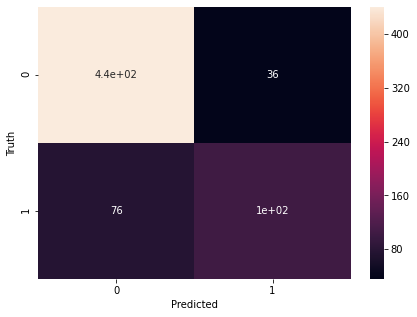

In [40]:
# Confusion matrix for SVM
cm_SVM = confusion_matrix(y_test, predictionsSVM)
plt.figure (figsize=(7,5))
sns.heatmap(cm_SVM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
# Calculating evaluation metrics using the predictionsSVM and y_test
SVM_Accuracy_Score = metrics.accuracy_score(y_test, predictionsSVM)
SVM_JaccardIndex = metrics.jaccard_score(y_test, predictionsSVM)
SVM_F1_Score = metrics.f1_score(y_test, predictionsSVM)
SVM_Log_Loss = 'NA'
print("SVM accuracy score : ", SVM_Accuracy_Score)
print("SVM jaccardIndex : ", SVM_JaccardIndex)
print("SVM F1_score : ", SVM_F1_Score)

SVM accuracy score :  0.8290076335877863
SVM jaccardIndex :  0.4790697674418605
SVM F1_score :  0.6477987421383646


### Comparing the Classification Model base on Accuracy, Jaccard Index, and F1-Score


In [42]:
# Making tabular format for each metrics
d = {'KNN':[KNN_Accuracy_Score,KNN_JaccardIndex,KNN_F1_Score,KNN_Log_Loss],
     'Tree':[Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score, Tree_Log_Loss],
     'LR':[LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score,LR_Log_Loss],
     'SVM':[SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score, SVM_Log_Loss]}
Report = pd.DataFrame(data=d, index = ['Accuracy','Jaccard Index','F1-Score', 'LogLoss'])
print(tabulate(Report, headers = 'keys', tablefmt = 'psql'))

+---------------+--------------------+---------------------+----------+--------------------+
|               | KNN                | Tree                |       LR | SVM                |
|---------------+--------------------+---------------------+----------+--------------------|
| Accuracy      | 0.7923664122137405 | 0.7740458015267175  | 0.821374 | 0.8290076335877863 |
| Jaccard Index | 0.3492822966507177 | 0.42412451361867703 | 0.450704 | 0.4790697674418605 |
| F1-Score      | 0.5177304964539008 | 0.5956284153005464  | 0.621359 | 0.6477987421383646 |
| LogLoss       | NA                 | NA                  | 6.43833  | NA                 |
+---------------+--------------------+---------------------+----------+--------------------+


## Conclusions

#### Base on this analysis, we can conclude that classification algorithms in machine learning can used to modelling for weather data. With several classification algorithms applied, we can see that SVM is the best classification algorithm to use to classify weather data of Australia, with 82.9% of accuracy, 47.9% of Jaccard Index, and 64.77% of F1-Score.


## <h3 align="center"> by Andika Lumbantoruan <h3/>
